On va ici découvrir pourquoi changer les paramètres de discrétisation affecte autant la solution.

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Créons une fonction relative à l'équation de convection linéaire qui va nous permettre d'ajuster directement une variable : nx

In [2]:
def linearconv(nx):
    dx = 2/(nx-1)
    nt=20
    dt=0.025
    c=1
    
    x=numpy.linspace(0,2,nx)
    
    u=numpy.ones(nx)
    lbound=numpy.where(x>=0.5)
    ubound=numpy.where(x<=1)
    u[numpy.intersect1d(lbound,ubound)]=2
    
    for n in range(nt): 
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
    
    pyplot.plot(x, u, color='#003366', ls='--', lw=1)
    pyplot.ylim(0,2.5);  

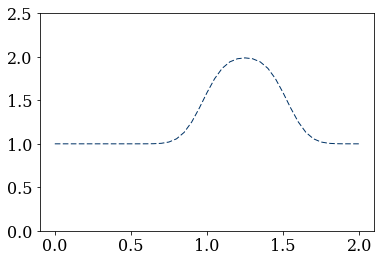

In [3]:
linearconv(41)

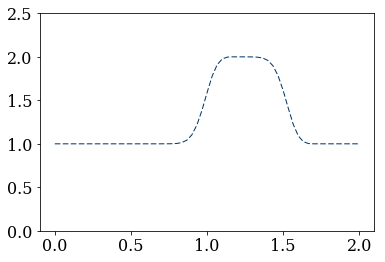

In [4]:
linearconv(61)

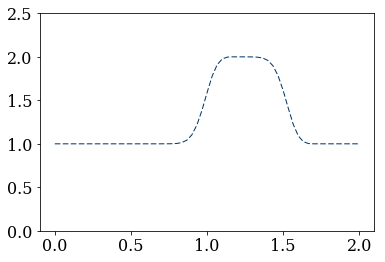

In [5]:
linearconv(61)

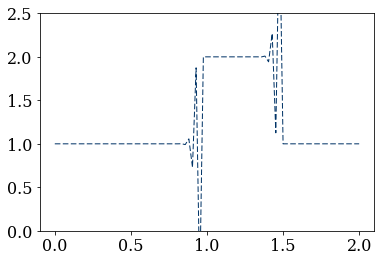

In [6]:
linearconv(85)

### Problème ? 

En fait, on a considéré le dx de plus en plus petit alors que dt restait constant. Jusqu'au moment où dx devient plus petit que cdt et la solution devient instable.

### Solution ? 

On introduit alors le parametre sigma=cdt/dx <= 1 qui est le nombre Courant-Friedrichs-Lewy (CFL).

In [7]:
def linearconv(nx):
    dx=2/(nx-1)
    nt=20
    c=1
    sigma=0.5
    dt=sigma*dx
    
    x=numpy.linspace(0,2,nx)
    
    u = numpy.ones(nx) 
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)]=2 
    
    for n in range(nt):  
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
        
    pyplot.plot(x, u, ls='--', lw=2)
    pyplot.ylim(0,2.5);


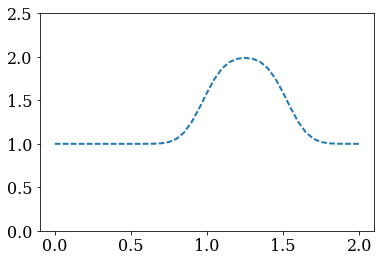

In [8]:
linearconv(41)

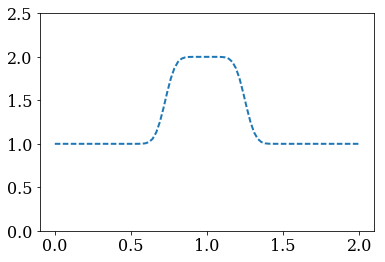

In [9]:
linearconv(85)

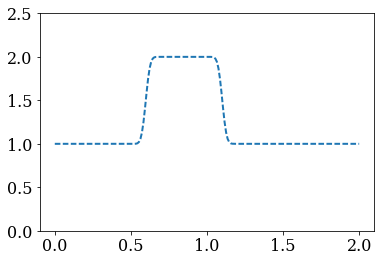

In [10]:
linearconv(200)